In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/home/soheil/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
df_W1=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201501-citibike-tripdata.csv')
df_W2=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201502-citibike-tripdata.csv')
df_W3=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201503-citibike-tripdata.csv')

df_W = pd.concat([df_W1, df_W2, df_W3], ignore_index=True)

df_S1=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201507-citibike-tripdata.csv')
df_S2=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201508-citibike-tripdata.csv')
df_S3=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201509-citibike-tripdata.csv')

df_S = pd.concat([df_S1, df_S2, df_S3], ignore_index=True)


In [17]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

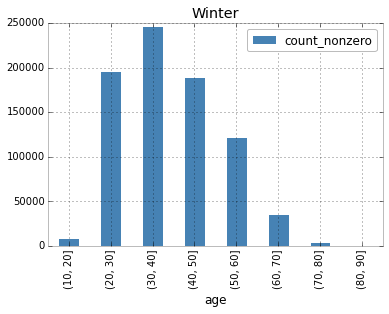

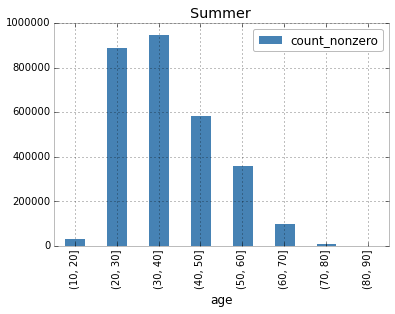

In [18]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

In [19]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999871000078544, 0.0)
summer, normal fit (0.99999966446403288, 0.0)


In [20]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


In [23]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [24]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1162110950.0, nan)
summer, normal fit (302272425.0, nan)
